In [1]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
now = datetime.datetime.now().replace(hour=datetime.datetime.now().hour - 2)

In [3]:
datetimestr = now.strftime('%Y%m%d_%00806')
datetimestr

'20211106_0806'

In [4]:
uri = 'https://www.meteoschweiz.admin.ch/product/output/forecast-chart/version__' + datetimestr + '/de/900000.json'
referer = 'https://www.meteoschweiz.admin.ch/home.html?tab=overview'

In [5]:
response = requests.get(uri, headers={'Referer': referer})
response.status_code

200

In [6]:
data = response.json()
for day in data:
    print(day['day_string'])

Heute
Sonntag
Montag
Dienstag
Mittwoch
Donnerstag
Freitag


In [7]:
data[0].keys()

dict_keys(['max_date', 'rainfall', 'day_string', 'sunshine', 'symbols', 'current_time_string', 'variance_rain', 'variance_range', 'min_date', 'temperature', 'wind_gust_peak', 'new_day', 'current_time', 'wind'])

In [8]:
def create_df(day):
    return pd.DataFrame({
        'timestamp': map(lambda x: x[0], day['sunshine']),
        'rainfall': map(lambda x: x[1], day['rainfall']),
        'sunshine': map(lambda x: x[1], day['sunshine']), 
        'temperature': map(lambda x: x[1], day['temperature']),
    })
    

In [9]:
df = None

for day in data:
    temp_df = create_df(day)
    if df is None:
        df = temp_df
    else:
        df = pd.concat([df, temp_df])
df['datetime'] = df['timestamp'].map(lambda x: datetime.datetime.fromtimestamp(x/1000.0))
df.head(20)

,timestamp,rainfall,sunshine,temperature,datetime
0,1636153200000,0.0,0,2.0,2021-11-06 00:00:00
1,1636156800000,0.0,0,1.7,2021-11-06 01:00:00
2,1636160400000,0.0,0,1.3,2021-11-06 02:00:00
3,1636164000000,0.0,0,1.3,2021-11-06 03:00:00
4,1636167600000,0.0,0,1.0,2021-11-06 04:00:00
5,1636171200000,0.0,0,0.3,2021-11-06 05:00:00
6,1636174800000,0.0,0,0.4,2021-11-06 06:00:00
7,1636178400000,0.0,0,0.4,2021-11-06 07:00:00
8,1636182000000,0.0,7,0.4,2021-11-06 08:00:00
9,1636185600000,0.0,60,0.5,2021-11-06 09:00:00


<AxesSubplot:xlabel='datetime'>

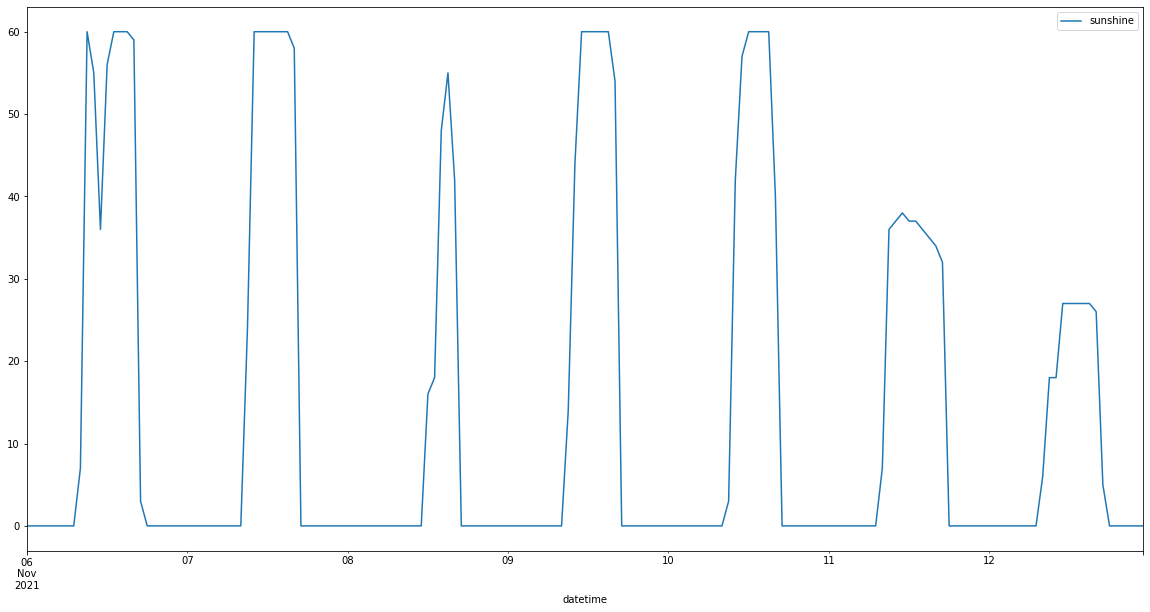

In [10]:
df.plot(kind='line', x='datetime', y='sunshine', figsize=(20,10))

In [11]:
df.to_csv('./weatherforecast.csv')

In [14]:
sunshine_data = df[['sunshine', 'datetime']]
sunshine_data.to_csv('sunshine_hourly.csv')